**USING THE GENSIM LIBRARY TO TRAIN WORD2VEC FEATURE VECTORS**

In [1]:
import gensim
from nltk.corpus import brown

In [2]:
sentences = brown.sents()

model = gensim.models.Word2Vec(sentences, min_count=1, vector_size=100, workers=4, window=5)

In [3]:
model.save("model/brown_word2vec")

In [4]:
model = gensim.models.Word2Vec.load("model/brown_word2vec")

In [5]:
print(model.wv.most_similar('human'))

[('community', 0.9628366827964783), ('political', 0.9542821049690247), ('development', 0.94892817735672), ('policy', 0.9420711398124695), ('general', 0.94094318151474), ('form', 0.9353911876678467), ('value', 0.9348944425582886), ('religious', 0.9342473745346069), ('interest', 0.9315283894538879), ('moral', 0.9306718707084656)]


In [6]:
print(model.wv.most_similar('money'))

[('care', 0.9179365634918213), ('work', 0.906072735786438), ('job', 0.905714213848114), ('others', 0.904369056224823), ('trouble', 0.8993988633155823), ('students', 0.8971582055091858), ('lot', 0.8954932689666748), ('landmarks', 0.893583357334137), ('order', 0.8923814296722412), ('themselves', 0.8917840719223022)]


In [7]:
print(model.wv.most_similar(positive=['county', 'country'], negative=['resident']))

[('Plans', 0.895776093006134), ('locality', 0.8852425813674927), ('reservoir', 0.8766545057296753), ('woods', 0.8765461444854736), ('church', 0.8755216002464294), ('Fifties', 0.8742607235908508), ('stage', 0.8707998991012573), ('town', 0.8690769672393799), ('cafeteria', 0.8684977889060974), ('nation', 0.8684077858924866)]


In [8]:
print(model.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


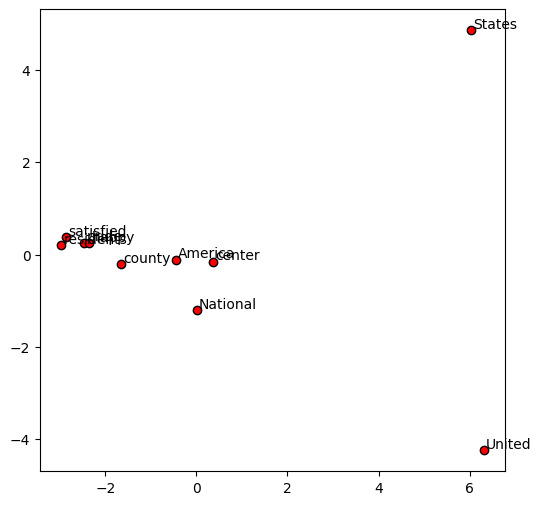

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.wv.key_to_index.keys() ]
    
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

display_pca_scatterplot(model, words=["United", "States", "America", "pride", "National", "happy", "satisfied", "center", "county", "residents"], sample=0)